In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [3]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

,label,current_mean,current_std,current_median,current_min,current_max,current_range,current_rms,voltage_mean,voltage_std,...,voltage_min,voltage_max,voltage_range,voltage_rms,current_dom_freq,voltage_dom_freq,power_mean,power_std,power_max,power_median
0,0,170.268118,187.569583,48.771854,38.259331,543.659705,505.400374,252.977605,25.198245,6.411859,...,6.225168,35.420148,29.194980,25.997268,0.005,0.005,4715.614979,5666.729056,16830.808548,1525.393694
1,1,98.660618,121.626205,30.533589,28.845716,412.712467,383.866751,156.374188,17.712078,5.425436,...,2.725810,31.506571,28.780761,18.520418,0.005,0.005,2225.671458,3568.671965,12909.236790,488.092097
2,1,145.266381,164.298900,41.367456,28.532909,504.590914,476.058005,219.001094,17.508980,7.059797,...,2.631505,29.959648,27.328143,18.872094,0.005,0.015,3133.711817,4836.812985,14963.065895,554.903052
3,0,164.897466,176.845713,67.355283,29.163476,531.489774,502.326298,241.472998,23.869114,4.263244,...,19.820252,32.446268,12.626016,24.244979,0.005,0.005,4677.164479,5714.742028,17209.822858,1507.075672
4,1,127.164414,165.700945,30.719883,28.814251,486.115985,457.301734,208.543298,13.825680,4.842154,...,0.469564,26.449272,25.979707,14.645090,0.005,0.005,1409.821819,1979.326717,12102.848304,480.182667


Beschränkter Pairplot gespeichert unter: plots/ex_03/feature_pairplot_6vars.png


<Figure size 1000x1000 with 0 Axes>

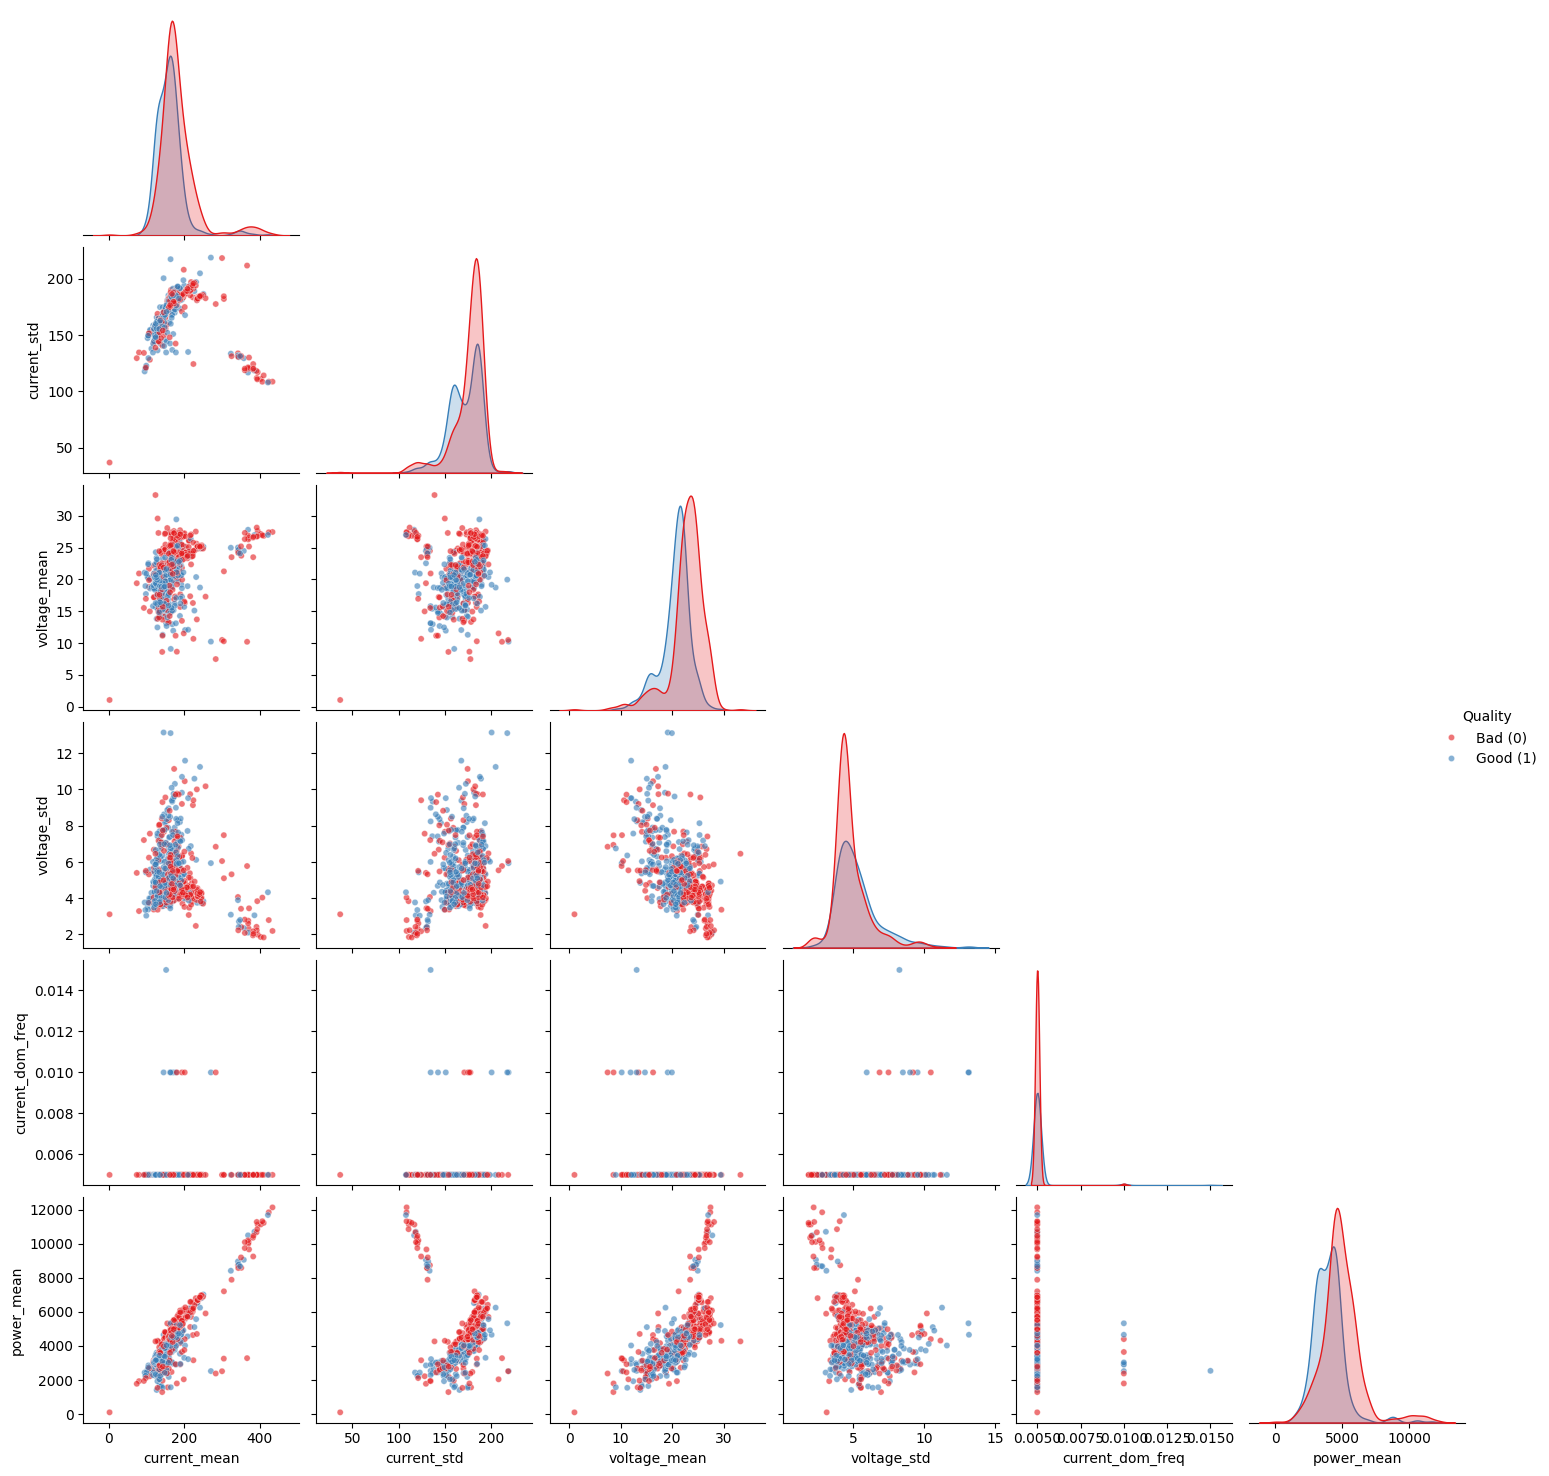

In [6]:
# Exercise 3.3 (beschränkt auf 6 Features) – aktualisiert für Seaborn v0.14+

import seaborn as sns
import matplotlib.pyplot as plt

# Subset von 6 Features + Label
cols = [
    'current_mean', 'current_std',
    'voltage_mean', 'voltage_std',
    'current_dom_freq', 'power_mean',
    'label'
]
df_plot = features[cols].copy()
df_plot['label'] = df_plot['label'].astype('category')

# Pairplot mit fill statt shade im diagonal plot
plt.figure(figsize=(10, 10))
pairgrid = sns.pairplot(
    df_plot,
    hue='label',
    vars=[c for c in cols if c != 'label'],
    palette='Set1',
    diag_kind='kde',
    corner=True,
    plot_kws={'alpha': 0.6, 's': 20},
    diag_kws={'fill': True}      # <-- hier angepasst
)

# Legende anpassen
pairgrid._legend.set_title('Quality')
for t, l in zip(pairgrid._legend.texts, ['Bad (0)', 'Good (1)']):
    t.set_text(l)

# Speichern als PNG
output_file = plot_path / "feature_pairplot_6vars.png"
pairgrid.savefig(output_file, dpi=300)

print(f"Beschränkter Pairplot gespeichert unter: {output_file}")


## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.


In [11]:
### 1. Which features appear most effective at separating the quality classes?
- **Power Mean (`power_mean`)**: Gute Zyklen ("Good") tendieren zu einem niedrigeren bis moderaten mittleren Leistungswert, während fehlerhafte ("Bad") Zyklen auffallend hohe oder sehr niedrige Leistungswerte zeigen.  
- **Current Standard Deviation (`current_std`)**: Die Streuung im Stromsignal trennt Klassen, da instabile Schweißzyklen (häufig Fehler) stärkere Fluktuationen im Strom aufweisen.  
- **Voltage Mean (`voltage_mean`)**: Zwar etwas weniger ausgeprägt, aber fehlerfreie Zyklen weisen tendenziell einen engeren Spannungsbereich um den Mittelwert auf.

---

### 2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
- **Correlation Observed**  
  - `current_mean` und `power_mean` sind eng korreliert (höherer mittlerer Strom = höhere mittlere Leistung).  
  - `voltage_mean` und `power_mean` ebenfalls teils korreliert, aber schwächer.  
- **Redundanz-Entfernung**  
  - Wir könnten z. B. **nur eines** aus dem Paar `{current_mean, power_mean}` behalten.  
  - Ebenso sind `current_std` und `power_std` korreliert hier könnte man eines weglassen.

---

### 3. Explain the physical significance of your selected features
- **Current Mean & Std**  
  - Mittlerer Strom spiegelt die durchschnittliche Energiezufuhr wider.  
  - Standardabweichung zeigt Fluktuationen im Lichtbogen, die auf Instabilität hinweisen.  
- **Voltage Mean**  
  - Stabilität der Lichtbogenlänge. Große Abweichungen deuten auf Unterbrechungen hin.  
- **Power Mean**  
  - Kombiniert Spannung × Strom – direkt proportional zur eingebrachten Energie.  
- **Dominant Frequencies**  
  - Periodische Muster (z. B. Flicker) können auf Materialübergang oder Abschmelzverhalten hinweisen.

---

### 4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
1. **Power Mean**: stärkste Trennkraft zwischen gut/fehlerhaft  
2. **Current Std** — misst Prozessinstabilität  
3. **Voltage Mean** — Hinweise auf Lichtbogen-stabilität  
4. **Current Mean** — Grundlegende Energiezufuhr  
5. **Current Dominant Frequency** — periodische Fluktuations-muster  

*Begründung:* Diese Auswahl deckt Energielevel, Stabilität und zeitliche Muster ab, ohne zu sehr redundante Features mitzunehmen.

---

### 5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.
- **Nicht-lineare Trennung:** Modelle mit nicht-linearen Entscheidungsgrenzen (z. B. Random Forests) kommen mit den Verteilungen besser klar.  
- **Feature Scaling:** RMS- oder Log-Transformation kann Ausreißer abmildern.  
- **Interaktionseffekte:** Kombinationen wie `voltage_mean × current_std` könnten zusätzliche Unterscheidung liefern.  
- **Outlier Handling:** Extreme Ausreißer vor dem Training bereinigen, um Robustheit zu erhöhen.

SyntaxError: invalid character '×' (U+00D7) (2837108358.py, line 25)